# Divorce Classification

In this project a short classification analysis of the [dataset](https://www.kaggle.com/datasets/csafrit2/predicting-divorce) from Kaggle will be conducted which contains evaluating question about the quality of their marriage of about 150 couples from Turkey. The aim is predict the if a couple will divorce or not.

## **Import the required libraries**

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


## **Reading and understanding of the data**

The data was collected by a research group from Turkey, in order to develope models predicting divorce. The corresponding paper can be found [here](https://www.kaggle.com/datasets/csafrit2/predicting-divorce). Supposedly, the participants has an equal proportion of men and women and mostly came from the Black Sea region. About 75% of participants had children. The study did include divorced participants and those who are happily married and not even consider divorce. This data set here contains only questions of happiness in marriage and divorce thought ranked on a scale of 0-4 with 0 being the lowest and 4 being the highest. Here are the first five questions.

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
1. I know we can ignore our differences, even if things get hard sometimes.
1. When we need it, we can take our discussions with my spouse from the beginning and correct it.
1. When I discuss with my spouse, to contact him will eventually work.
1. The time I spent with my wife is special for us.


There is one last column `Divorce_Y_N` to indicate whether the participant was divorced or not. 


In [149]:
data = pd.read_csv("divorce.csv")

Create a dictionary to get description of the features, because the column names may be interpreted ambigously.

In [150]:
dict_explain = {
'Sorry_end': 'If one of us apologizes when our discussion deteriorates, the discussion ends.',
'Ignore_diff':'I know we can ignore our differences, even if things get hard sometimes.',
'begin_correct': 'When we need it, we can take our discussions with my spouse from the beginning and correct it.',
'Contact': 'When I discuss with my spouse, to contact him will eventually work.',
'Special_time':'The time I spent with my wife is special for us.',
'No_home_time': 'We don\'t have time at home as partners.',
'2_strangers': 'We are like two strangers who share the same environment at home rather than family.',
'enjoy_holiday': 'I enjoy our holidays with my wife.',
'enjoy_travel':'I enjoy traveling with my wife.',
'common_goals': 'Most of our goals are common to my spouse.',
'harmony': 'I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
'freeom_value':' My spouse and I have similar values in terms of personal freedom.',
'entertain': 'My spouse and I have similar sense of entertainment.',
'people_goals': 'Most of our goals for people (children, friends, etc.) are the same.',
'dreams':'Our dreams with my spouse are similar and harmonious.',
'love': 'We\'re compatible with my spouse about what love should be.',
'happy': 'We share the same views about being happy in our life with my spouse',
'marriage': 'My spouse and I have similar ideas about how marriage should be.',
'roles': 'My spouse and I have similar ideas about how roles should be in marriage',
'trust': 'My spouse and I have similar values in trust.',
'likes': 'I know exactly what my wife likes.',
'care_sick': 'I know how my spouse wants to be taken care of when she/he sick.',
'fav_food': 'I know my spouse\'s favorite food.',
'stresses': 'I can tell you what kind of stress my spouse is facing in her/his life.',
'inner_world': 'I have knowledge of my spouse\'s inner world.',
'anxieties': 'I know my spouse\'s basic anxieties.',
'current_stress': 'I know what my spouse\'s current sources of stress are.',
'hopes_wishes': 'I know my spouse\'s hopes and wishes.',
'know_well': 'I know my spouse very well.',
'friends_social': 'I know my spouse\'s friends and their social relationships.',
'Aggro_argue': 'I feel aggressive when I argue with my spouse.',
'Always_never': 'When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’.',
'negative_personality': 'I can use negative statements about my spouse\'s personality during our discussions.',
'offensive_expressions': 'I can use offensive expressions during our discussions.',
'insult': 'I can insult my spouse during our discussions.',
'humiliate': 'I can be humiliating when we discussions.',
'not_calm': 'My discussion with my spouse is not calm.',
'hate_subjects': 'I hate my spouse\'s way of open a subject.',
'sudden_discussion': 'Our discussions often occur suddenly.',
'idk_what\'s_going_on': 'We\'re just starting a discussion before I know what\'s going on.',
'calm_breaks':'When I talk to my spouse about something, my calm suddenly breaks.',
'argue_then_leave': 'When I argue with my spouse, ı only go out and I don\'t say a word.',
'silent_for_calm': 'I mostly stay silent to calm the environment a little bit.',
'good_to_leave_home': 'Sometimes I think it\'s good for me to leave home for a while.',
'silence_instead_of_discussion': 'I\'d rather stay silent than discuss with my spouse.',
'silence_for_harm': 'Even if I\'m right in the discussion, I stay silent to hurt my spouse.',
'silence_fear_anger': 'When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.',
'I\'m_right': 'I feel right in our discussions.',
'accusations': 'I have nothing to do with what I\'ve been accused of.',
'I\'m_not_guilty': 'I\'m not actually the one who\'s guilty about what I\'m accused of.',
'I\'m_not_wrong': 'I\'m not the one who\'s wrong about problems at home.',
'no_hesitancy_inadequate': 'I wouldn\'t hesitate to tell my spouse about her/his inadequacy.',
'you\'re_inadequate': 'When I discuss, I remind my spouse of her/his inadequacy.',
'incompetence': 'I\'m not afraid to tell my spouse about her/his incompetence.'
}

In [151]:
data.columns

Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

In [152]:
data.dtypes.value_counts()

int64    55
dtype: int64

In [153]:
data.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


Look at the shape of the data set.

In [154]:
data.shape

(170, 55)

The original data set contains 170 participants with 54 features questions.

In [155]:
data['Divorce_Y_N'].value_counts()

0    86
1    84
Name: Divorce_Y_N, dtype: int64

Remove duplicates since with 55 column it should be unlikely having two identical rows.

In [156]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
data['Divorce_Y_N'].value_counts()

0    84
1    66
Name: Divorce_Y_N, dtype: int64

20 observations were dropped, and now the distribution of divorced feature is slightly skewed in favor of not divorced. 

Look at the features groupby by divorced.

In [158]:
divorce_top = data.groupby(by='Divorce_Y_N').mean().T[1].sort_values(ascending=False).head(10)
no_divorce_top = data.groupby(by='Divorce_Y_N').mean().T[0].sort_values(ascending=False).head(10)


In [159]:
for row in divorce_top.index:
    value = round(divorce_top.loc[row],2)
    print(dict_explain[row],' mean: ',value)

Our discussions often occur suddenly.  mean:  3.56
We're just starting a discussion before I know what's going on.  mean:  3.48
My discussion with my spouse is not calm.  mean:  3.48
When I talk to my spouse about something, my calm suddenly breaks.  mean:  3.44
I have nothing to do with what I've been accused of.  mean:  3.39
I wouldn't hesitate to tell my spouse about her/his inadequacy.  mean:  3.38
I'm not actually the one who's guilty about what I'm accused of.  mean:  3.38
I mostly stay silent to calm the environment a little bit.  mean:  3.35
I feel right in our discussions.  mean:  3.33
I feel aggressive when I argue with my spouse.  mean:  3.3


In [160]:
for row in no_divorce_top.index:
    value = round(no_divorce_top.loc[row],2)
    print(dict_explain[row],value)

I feel right in our discussions. 2.06
Even if I'm right in the discussion, I stay silent to hurt my spouse. 1.96
I mostly stay silent to calm the environment a little bit. 1.93
I'd rather stay silent than discuss with my spouse. 1.61
I'm not the one who's wrong about problems at home. 1.6
I wouldn't hesitate to tell my spouse about her/his inadequacy. 1.56
I'm not actually the one who's guilty about what I'm accused of. 1.39
I have nothing to do with what I've been accused of. 1.3
When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger. 1.24
When I discuss, I remind my spouse of her/his inadequacy. 1.18


One can see that for divorced participants, the mean of the top features is significantly higher.

Verify that feature columns are scaled.

In [161]:
data.iloc[:, :-1].min().value_counts()

0    54
dtype: int64

In [162]:
data.iloc[:, :-1].max().value_counts()

4    54
dtype: int64

# Predictive analysis

Prepare data.

In [163]:
### BEGIN SOLUTION
feature_cols = data.columns[:-1]
target = data.columns[-1] 

X = data[feature_cols]
y = data[target]


In [164]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not divorced', 'divorced']); ax.yaxis.set_ticklabels(['not divorced', 'divorced'])

Use the various classification models with optimized hyperparameters via GridSearchCV to find the best model.

## Logistic Regression

In [165]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters,cv=10)
logreg_cv.fit(x_reduced, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [166]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9800000000000001


In [167]:
y_pred = logreg_cv.predict(x_reduced)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        66

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



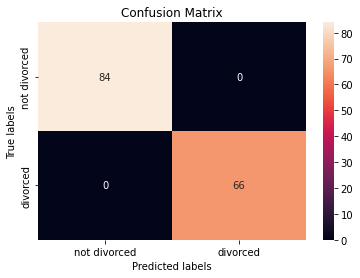

In [168]:
plot_confusion_matrix(y,y_pred)

## KNN

In [169]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [170]:
knn_cv = GridSearchCV(KNN, parameters,cv=10)
knn_cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [171]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.9800000000000001


In [172]:
y_pred = knn_cv.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        66

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



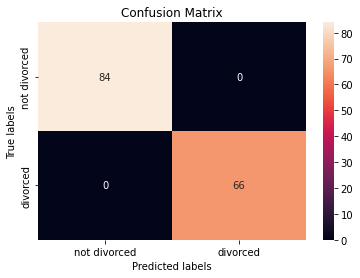

In [173]:
plot_confusion_matrix(y,y_pred)

##  Support Vector Machines

In [174]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [175]:
svm_cv = GridSearchCV(svm, parameters,cv=10)
svm_cv.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [176]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}
accuracy : 0.9800000000000001


In [177]:
y_pred = svm_cv.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        66

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



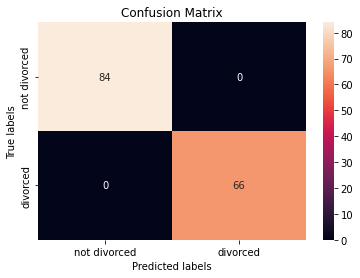

In [178]:
plot_confusion_matrix(y,y_pred)

## Decision Trees

In [179]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [180]:
tree_cv = GridSearchCV(tree, parameters,cv=10)
tree_cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [181]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9866666666666667


In [182]:
y_pred = tree_cv.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       1.00      0.94      0.97        66

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



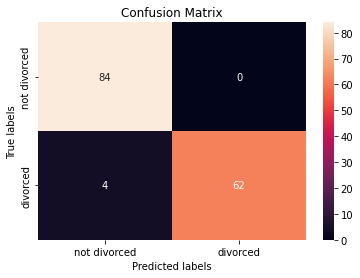

In [183]:
plot_confusion_matrix(y,y_pred)

The Decision tree with optimized hyperparameters has the best accuracy with 98.67%, though the best estimator here does classify everything correctly. If one runs gridsearch on the decision tree the optimal hyperparameters may vary but the accuracy is always  constant.<br>
The other models with optimized hyperparameters have all a accuracy of about 98%, but classify everything correctly. 

## Feature Importance

Use Logistic Regression  from above to get some insight into the feature importances by its coefficients.

In [184]:
estimator = LogisticRegression(C= 1, penalty= 'l2', solver='lbfgs')
# Train the model
estimator.fit(X, y)

LogisticRegression(C=1)

In [185]:
# Extract and those feature whose absolute coefficients are greater than 0.25
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter absolute coefficients less than 0.25
    for coef, feat in zip(regression_model.coef_[0, :], X.columns):
        if abs(coef) >= 0.25:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1],)}
    return coef_dict

In [186]:
coef_dict = get_feature_coefs(estimator)
coef_dict = pd.Series(data=coef_dict).sort_values(ascending=False)


Look at the features with the highest coefficents.

In [187]:
for row in coef_dict.index:
    value = round(coef_dict.loc[row],2)
    print(dict_explain[row],' coefficient: ',value)


We're just starting a discussion before I know what's going on.  coefficient:  0.6
I know my spouse's basic anxieties.  coefficient:  0.49
I have nothing to do with what I've been accused of.  coefficient:  0.45
Sometimes I think it's good for me to leave home for a while.  coefficient:  0.38
I feel aggressive when I argue with my spouse.  coefficient:  0.37
We share the same views about being happy in our life with my spouse  coefficient:  0.36
When we need it, we can take our discussions with my spouse from the beginning and correct it.  coefficient:  0.35
I know my spouse's hopes and wishes.  coefficient:  0.34
We don't have time at home as partners.  coefficient:  0.33
Our discussions often occur suddenly.  coefficient:  0.31
My spouse and I have similar values in trust.  coefficient:  0.3
Our dreams with my spouse are similar and harmonious.  coefficient:  0.3
When I discuss, I remind my spouse of her/his inadequacy.  coefficient:  0.3
My spouse and I have similar ideas about how 

One can see that not all features commonly are associated with an unhappy marriage.

## Conclusion

One can see that all models performed fairly good. It may be noted here looking at the original paper the research group achieved a accuracy of 98.82% using Artificial Neural Networks and only selecting the six most important features. The accuracy achieved here and in the paper cannot be straightforwadely compared, since accuracy may be defined differently.<br>
One flaw of the data is that is does not consider the sex, age and how many children the participants had, all factors which might have influence on a divorce decision.